In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

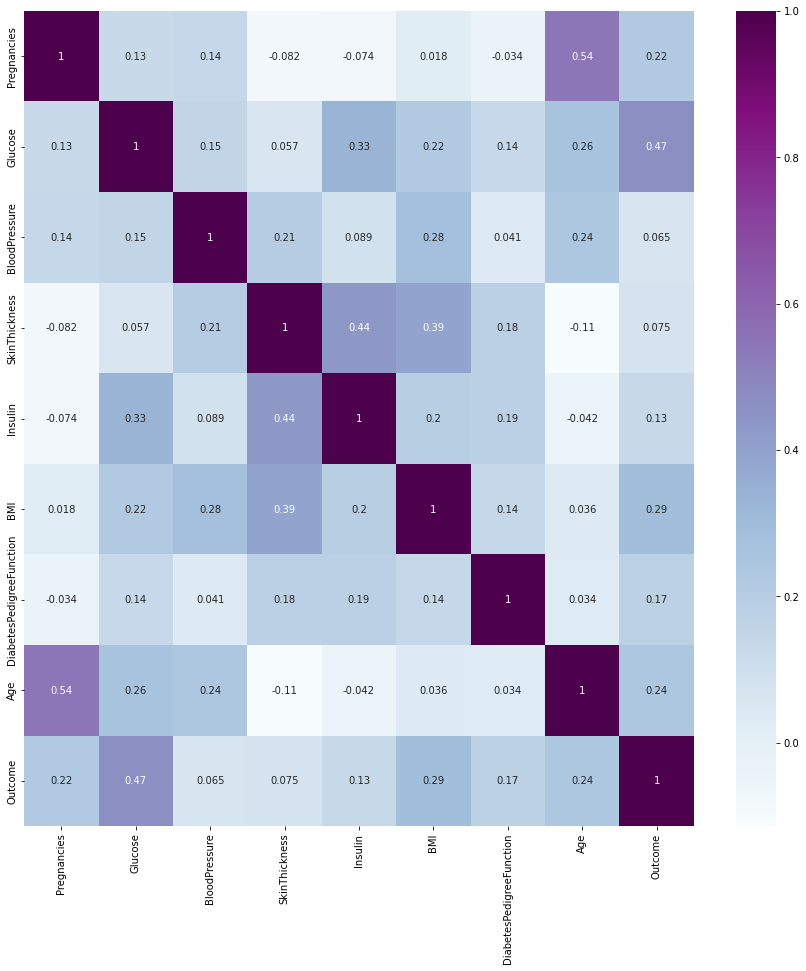

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap = "BuPu")
plt.show()

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
Y = df.Outcome
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 40)

In [8]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values = 0,strategy = 'mean')

X_train = fill_values.fit_transform(X_train)
X_test  = fill_values.fit_transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier()
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)

0.765625

In [10]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=40)

score = cross_val_score(RandomForestClassifier(),X,Y,cv=cv)

In [11]:
score.mean()

0.764935064935065

In [12]:
from sklearn.model_selection import RandomizedSearchCV

In [13]:
n_estimators      = [int(x) for x in np.linspace(start=100,stop=1500,num=15)]
max_features      = ['auto','sqrt']
max_depth         = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]

#Creating Random Grid

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth'    : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf'  : min_samples_leaf}


# Random Search using 5 fold cross validation across 10 diff combinations

random_search = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,cv=5,n_iter = 10,random_state=40)


random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=40)

In [14]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [15]:
random_search.best_score_

0.7638680659670165

In [16]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=40)

score = cross_val_score(random_search,X,Y,cv=cv)

In [17]:
score.mean()

0.7636363636363637